In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

### Quadratic Discriminant Analysis (Gaussian)

/Users/jamesmontgomery/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: covariance is not positive-semidefinite.


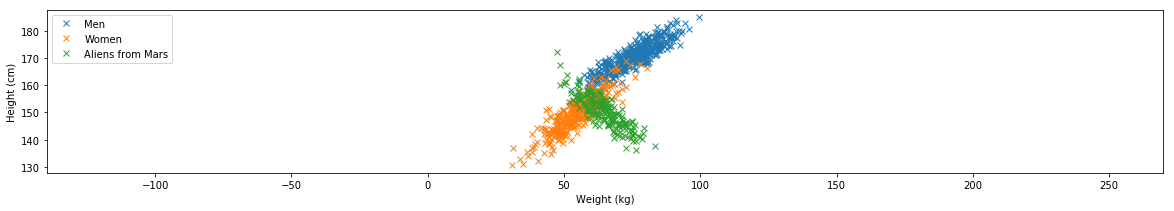

In [2]:
# initialize our data
n = 1000
X = np.zeros((n,2)) 
y = np.zeros((n, 3))

# class probabilities
true_theta = [0.4, 0.4, 0.2] 

#class means
true_means = [
              [75, 170], #men
              [55, 150], #women
              [65, 150]  #aliens
             ]

#class covariances
true_cov = [[[80, 50], [-5, 2]],
            [[60, 50], [-8, 2]],
            [[60, -50], [8, 2]]
           ]

for i in xrange(n):    
    # sample a class label
    y[i,:] = np.random.multinomial(1, true_theta, size=1).flatten()
    c = np.argmax(y[i,:])
    # sample the corresponding features.
    X[i,:] = np.random.multivariate_normal(true_means[c], true_cov[c], 1).flatten()
    
plt.figure(figsize=(20,3))
plt.plot(X[y[:,0]==1,0], X[y[:,0]==1,1], 'x', label='Men')
plt.plot(X[y[:,1]==1,0], X[y[:,1]==1,1], 'x', label='Women')
plt.plot(X[y[:,2]==1,0], X[y[:,2]==1,1], 'x', label='Aliens from Mars')
plt.axis('equal')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.legend(loc=2)
plt.show()

In [54]:
class quadatic_dsicriminant_analysis(object):
    def __init__(self):
        self.means = []
        self.covariances = []
        self.n_classes = None
        
    def preprocess(self,x,y=None):
        if len(x.shape) == 1:
            x = x.reshape(-1,1)
        if y is not None:
            if len(y.shape) == 1:
                y = y.reshape(-1,1)
            else:
                y = y.argmax(axis=1)
            n_classes = len(np.unique(y))
        else:
            n_classes = None
        return x, y, n_classes
                
    def train(self,x,y):
        x,y,self.n_classes = self.preprocess(x,y)
        
        for i in range(self.n_classes):
            x_train = x[y==i]
            self.means.append( x_train.mean(axis=0) )
            self.covariances.append( np.cov(x_train.T) )
            
    def predict(self,x):
        x,_,_ = self.preprocess(x)
        
        predictions = []
        for i in range(self.n_classes):
            p = multivariate_normal.pdf(x,mean=self.means[i],cov=self.covariances[i])
            predictions.append(p)
            
        predictions = np.array(predictions).T
        predictions = 1.0 * predictions / predictions.sum(axis=1).reshape(-1,1)
        return predictions
        
        

In [55]:
model = quadatic_dsicriminant_analysis()
model.train(X,y)
predictions = model.predict(X)

In [70]:
100.0 * y[ predictions.argmax(axis=1) == y.argmax(axis=1) ].shape[0] / y.shape[0]

87.6